In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

In [ ]:
x = np.arange(0, 250,2)
y = np.zeros(125)
y += 100
for i in range (0, 125,2):
    y[i] = 200
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [ ]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

In [ ]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [ ]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

In [ ]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

In [ ]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

In [ ]:
freq_ampli = freq_ampli.iloc[1:,:]

In [ ]:
plt.plot(freq_ampli.Freq,freq_ampli.Ampli)

In [ ]:
freq_ampli

In [ ]:
freq_ampli.Ampli.value_counts()

In [ ]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)

In [ ]:
yf1 = yf[yf != 0]
yf1

In [ ]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [ ]:
quefrency

In [ ]:
cepstrum

In [ ]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep = cep.iloc[1:,:]
plt.plot(cep.Quefrency,cep.Cepstrum)

In [ ]:
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

In [ ]:
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

In [ ]:
dfx = freq_ampli
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [ ]:
dfx = cep
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

In [ ]:
best_gmm0

In [ ]:
sns.distplot(seasonal_data['Value'],bins=50)
z,_ = best_gmm0.sample(250)
sns.distplot(z,bins=50)

In [ ]:
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
print(best_gmm0.score(z))

In [ ]:
best_gmm2

In [ ]:
best_gmm2.weights_

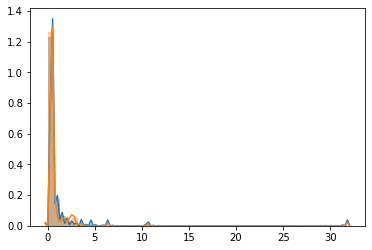

In [51]:
freq1 = freq_ampli
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [52]:
print(best_gmm2.score(freq1))
print(best_gmm2.score(y))

2.8370890235154813
2.808863089031804


In [53]:
freq1.describe()

,Freq,Ampli
count,124.000000,124.000000
mean,0.252000,1.624325
std,0.143745,4.202859
min,0.008000,0.400126
25%,0.128000,0.434673
50%,0.252000,0.569411
75%,0.376000,1.053244
max,0.496000,31.831826


In [54]:
best_gmm2.means_

array([[ 0.10326611,  0.4307166 ],
       [ 0.496     , 31.83182639],
       [ 0.48      ,  6.37038844],
       [ 0.41929603,  1.97197217],
       [ 0.488     , 10.61284323],
       [ 0.28251338,  0.66315989]])

In [42]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

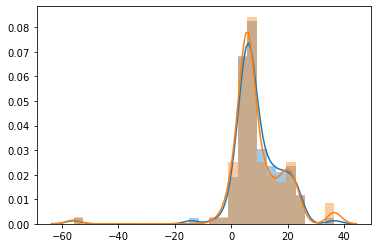

In [43]:
cep1 = cep
a,_ = best_gmm3.sample(52)
sns.distplot(cep1)
sns.distplot(a)

In [44]:
print(best_gmm3.score(cep1))
print(best_gmm3.score(a))

-4.5145517085116
-3.770220907794508


In [45]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

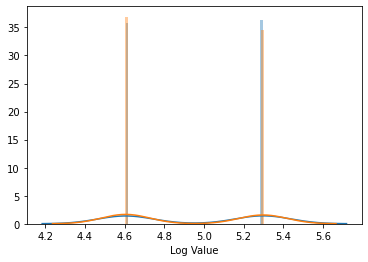

In [46]:
sns.distplot(nlog_data['Log Value'],bins=50)
z2,_ = best_gmm1.sample(250)
sns.distplot(z2,bins=50)

In [47]:
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
print(best_gmm1.score(z2))

5.295701563739873
4.73471733818726
